In [426]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


In [427]:
#Call for Loading The Iris Dataset
iris = load_iris()


In [428]:
#Method For Splitting the data into 10% test and 90% train
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)

In [429]:
slen_X_train = X_train[:,0]
swid_X_train = X_train[:,1]
plen_X_train = X_train[:,2]
pwid_X_train = X_train[:,3]
slen_X_test = X_test[:,0]
swid_X_test = X_test[:,1]
plen_X_test = X_test[:,2]
pwid_X_test = X_test[:,3]

In [430]:
class LinearRegression:
    def __init__(self):
        self.w = None
        self.error = []
        self.l2_error = []

    def mean_squared(self, X, target):
        return np.mean((np.dot(X, self.w) - target) ** 2)

    def gradient_descent(self, X, y, alpha, epochs):
        self.w = np.random.uniform(-1, 1, (X.shape[1],))
        n = X.shape[0]
        for _ in range(epochs):
            predicted = np.dot(X, self.w)
            gradient = (2 / n) * np.dot(X.T, (predicted - y))
            self.w -= alpha * gradient
            error = self.mean_squared(X, y)
            self.error.append(error)

    def fit(self, X, y, alpha=0.01, epochs=100):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.gradient_descent(X, y, alpha, epochs)

    def fit_l2(self, X, y, alpha=0.01, epochs=100, l=1):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        n = X.shape[0]
        self.w = np.random.uniform(-1, 1, (X.shape[1],))
        for _ in range(epochs):
            predicted = np.dot(X, self.w)
            gradient = (2 / n) * np.dot(X.T, (predicted - y)) + (2 * l * self.w)
            self.w -= alpha * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.dot(X, self.w[None].T)
    
def mean_squared(target, predicted):
    return np.mean((target - predicted) ** 2)


In [431]:
txt6312_model1 = LinearRegression()
X_train_reshaped = np.concatenate((np.ones((slen_X_train.shape[0], 1)), slen_X_train[:, np.newaxis]), axis=1)
txt6312_model1.fit(X_train_reshaped, swid_X_train, alpha=0.01, epochs=100)




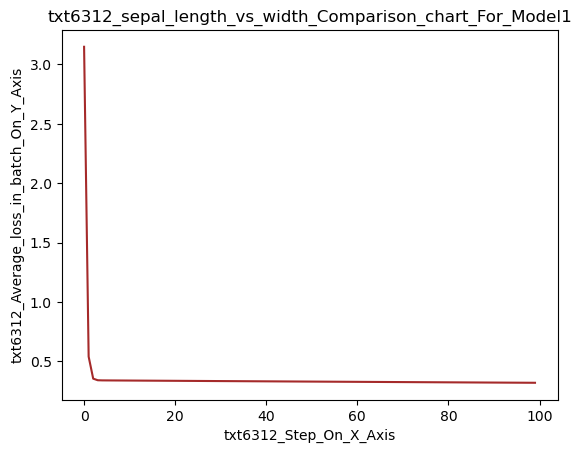

In [432]:
plt.plot(txt6312_model1.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model1')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

In [433]:
predict1 = txt6312_model1.predict(np.concatenate((np.ones((slen_X_test.shape[0], 1)), slen_X_test[:, np.newaxis]), axis=1))
txt6312_model1_acc = mean_squared(swid_X_test, predict1)
print("Mean Squared Error:", txt6312_model1_acc)
print("Learned Weights:", txt6312_model1.w)



Mean Squared Error: 0.2696838600556661
Learned Weights: [0.53226344 0.21161136 0.38838722]


In [434]:
txt6312_model1 = LinearRegression()
txt6312_model1.fit_l2(slen_X_train.reshape(-1, 1), swid_X_train, alpha=0.01, epochs=100, l=0.4)
txt6312_predict1_l2 = txt6312_model1.predict(slen_X_test.reshape(-1, 1))
txt6312_model1_l2_acc = mean_squared(swid_X_test, txt6312_predict1_l2)
print("Mean Squared Error with L2 Regularization:", txt6312_model1_l2_acc)


Mean Squared Error with L2 Regularization: 0.341388254104276


In [435]:
txt6312_model1.w

array([-0.06216218,  0.51798094])

In [436]:
txt6312_model2 = LinearRegression()
txt6312_model2.fit(swid_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
txt6312_predict2 = txt6312_model2.predict(swid_X_test[:, np.newaxis])
txt6312_model2_acc = mean_squared(slen_X_test, txt6312_predict2)
print("Mean Squared Error:", txt6312_model2_acc)


Mean Squared Error: 0.9840541908312987


In [437]:
txt6312_model3 = LinearRegression()
txt6312_model3.fit(slen_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
txt6312_predict3 = txt6312_model3.predict(slen_X_test[:, np.newaxis])
txt6312_model3_acc = mean_squared(plen_X_test, txt6312_predict3)
print("Mean Squared Error:", txt6312_model3_acc)


Mean Squared Error: 3.595215462112951


In [438]:
txt6312_model4 = LinearRegression()
txt6312_model4.fit(slen_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
txt6312_predict4 = txt6312_model4.predict(slen_X_test[:, np.newaxis])
txt6312_model4_acc = mean_squared(pwid_X_test, txt6312_predict4)
print("Mean Squared Error:", txt6312_model4_acc)


Mean Squared Error: 0.7186816919723215


In [439]:
txt6312_model5 = LinearRegression()
txt6312_model5.fit(plen_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
txt6312_predict5 =txt6312_model5.predict(plen_X_test[:, np.newaxis])
txt6312_model5_acc = mean_squared(slen_X_test, txt6312_predict5)
print("Mean Squared Error:", txt6312_model5_acc)


Mean Squared Error: 5.408831642643838


In [440]:
txt6312_model6 = LinearRegression()
txt6312_model6.fit(pwid_X_train[:, np.newaxis], slen_X_train, alpha=0.01, epochs=100)
txt6312_predict6 = txt6312_model6.predict(pwid_X_test[:, np.newaxis])
txt6312_model6_acc = mean_squared(slen_X_test, txt6312_predict6)
print("Mean Squared Error:", txt6312_model6_acc)


Mean Squared Error: 4.513068171863081


In [442]:
txt6312_model7 = LinearRegression()
txt6312_model7.fit(swid_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
txt6312_predict7 = txt6312_model7.predict(swid_X_test[:, np.newaxis])
txt6312_model7_acc = mean_squared(plen_X_test, txt6312_predict7)
print("Mean Squared Error:", txt6312_model7_acc)


Mean Squared Error: 3.409447839714003


In [441]:
txt6312_model8 = LinearRegression()
txt6312_model8.fit(swid_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
txt6312_predict8 = txt6312_model8.predict(swid_X_test[:, np.newaxis])
txt6312_model8_acc = mean_squared(pwid_X_test, txt6312_predict8)
print("Mean Squared Error:", txt6312_model8_acc)


Mean Squared Error: 0.6090836644164614


In [443]:
txt6312_model9 = LinearRegression()
txt6312_model9.fit(plen_X_train[:, np.newaxis], swid_X_train, alpha=0.01, epochs=100)
txt6312_predict9 = txt6312_model9.predict(plen_X_test[:, np.newaxis])
txt6312_model9_acc = mean_squared(swid_X_test, txt6312_predict9)
print("Mean Squared Error:", txt6312_model9_acc)


Mean Squared Error: 0.8967584554809656


In [444]:
txt6312_model10 = LinearRegression()
txt6312_model10.fit(pwid_X_train[:, np.newaxis], swid_X_train, alpha=0.01, epochs=100)
txt6312_predict10 = txt6312_model10.predict(pwid_X_test[:, np.newaxis])
txt6312_model10_acc = mean_squared(swid_X_test, txt6312_predict10)
print("Mean Squared Error:", txt6312_model10_acc)


Mean Squared Error: 0.5151540964524072


In [445]:
txt6312_model11 = LinearRegression()
txt6312_model11.fit(plen_X_train[:, np.newaxis], pwid_X_train, alpha=0.01, epochs=100)
txt6312_predict11 = txt6312_model11.predict(plen_X_test[:, np.newaxis])
txt6312_model11_acc = mean_squared(pwid_X_test, txt6312_predict11)
print("Mean Squared Error:", txt6312_model11_acc)


Mean Squared Error: 1.2960279023014005


In [446]:
txt6312_model12 = LinearRegression()
txt6312_model12.fit(pwid_X_train[:, np.newaxis], plen_X_train, alpha=0.01, epochs=100)
txt6312_predict12 = txt6312_model12.predict(pwid_X_train[:, np.newaxis])
txt6312_model12_acc = mean_squared(plen_X_train, txt6312_predict12)
print("Mean Squared Error:", txt6312_model12_acc)


Mean Squared Error: 4.9156630050442764


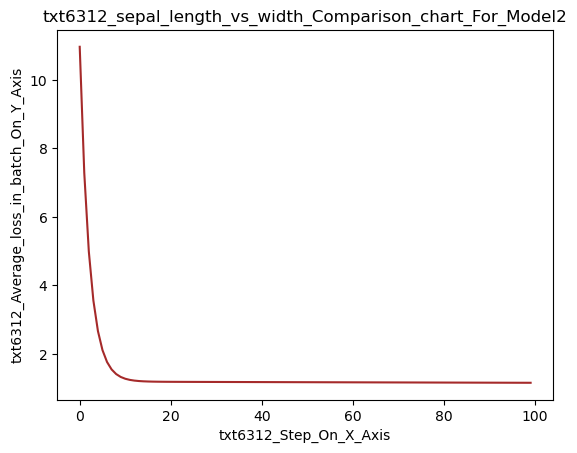

In [447]:
plt.plot(txt6312_model2.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model2')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

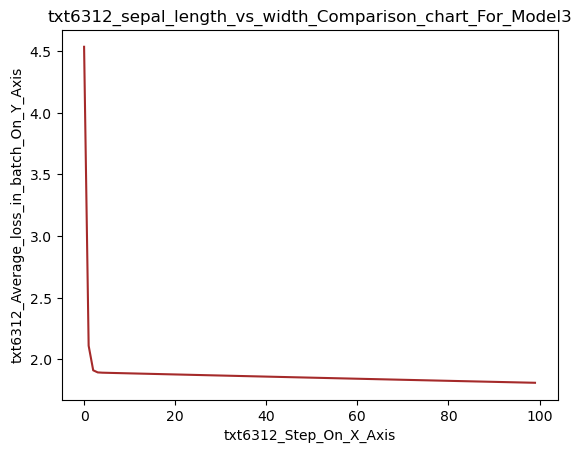

In [449]:
plt.plot(txt6312_model3.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model3')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

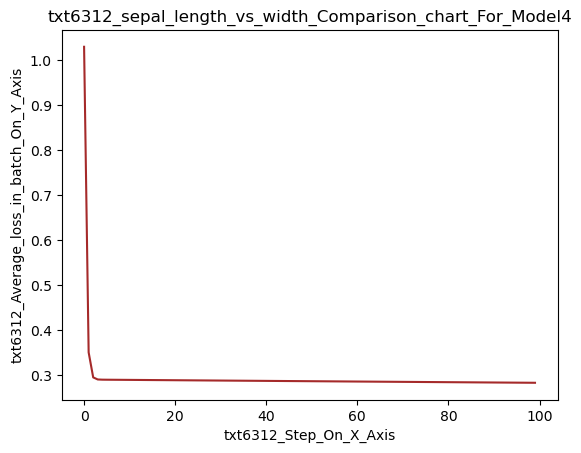

In [448]:
plt.plot(txt6312_model4.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model4')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

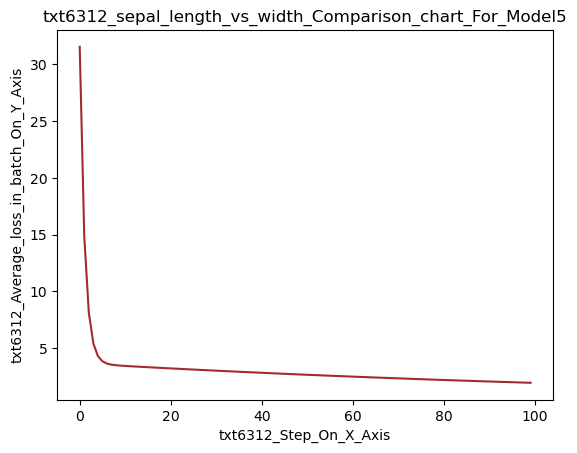

In [450]:
plt.plot(txt6312_model5.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model5')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

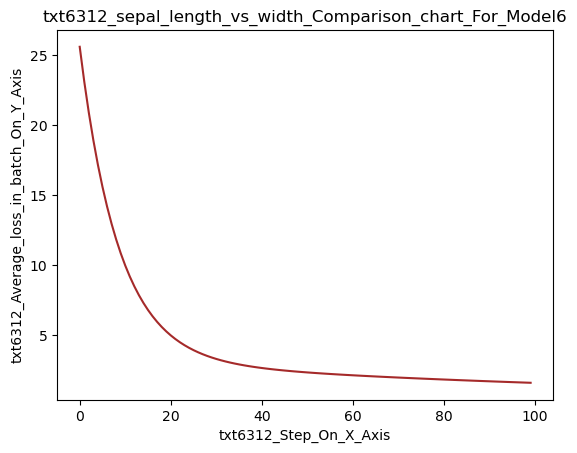

In [451]:
plt.plot(txt6312_model6.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model6')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

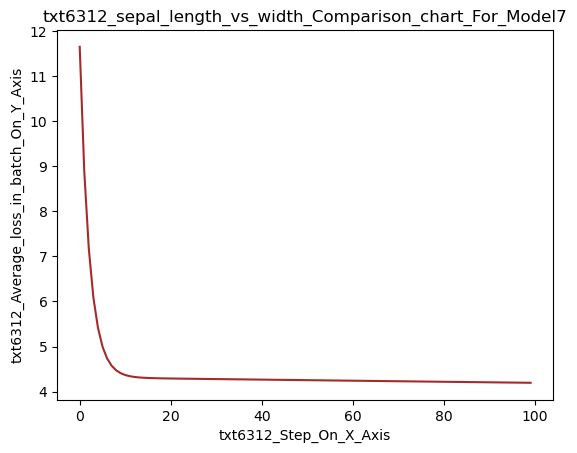

In [452]:
plt.plot(txt6312_model7.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model7')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

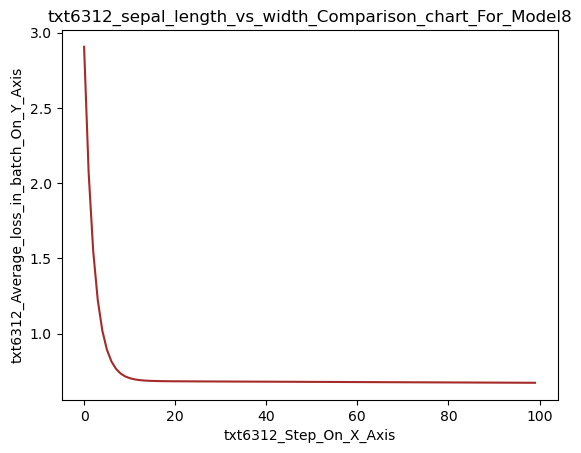

In [453]:
plt.plot(txt6312_model8.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model8')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

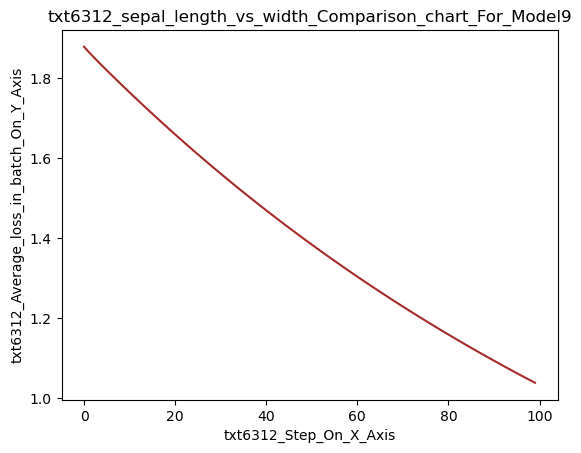

In [454]:
plt.plot(txt6312_model9.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model9')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

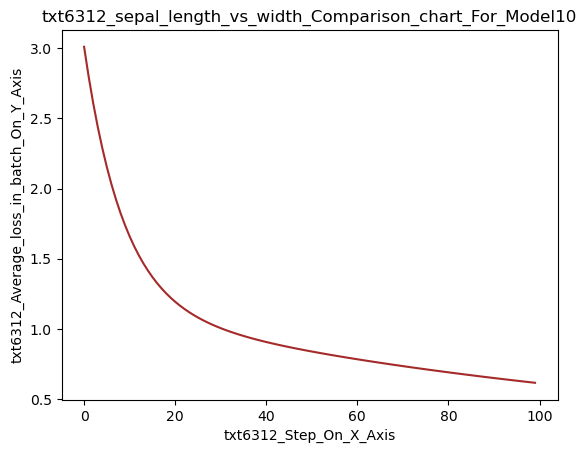

In [455]:
plt.plot(txt6312_model10.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model10')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

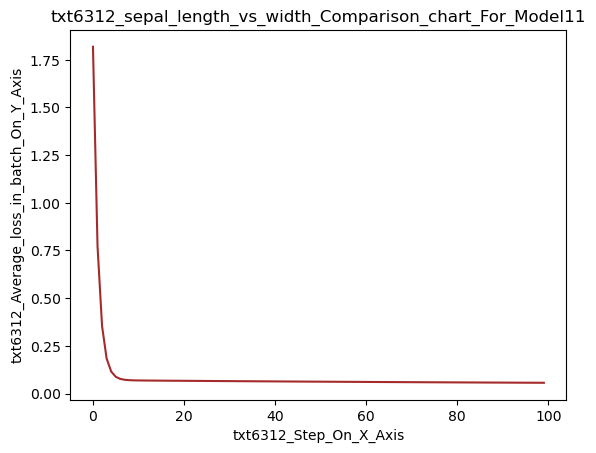

In [456]:
plt.plot(txt6312_model11.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model11')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()

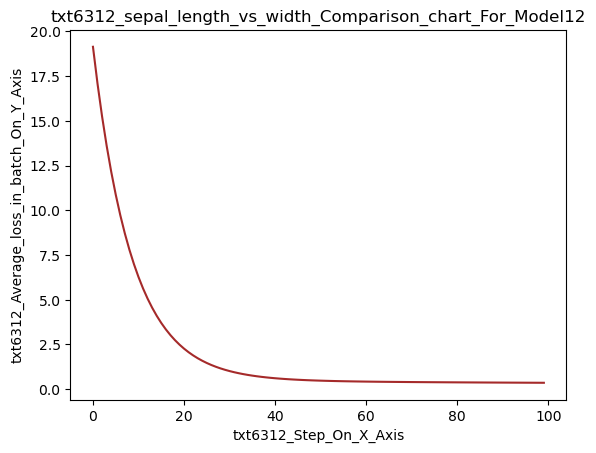

In [457]:
plt.plot(txt6312_model12.error,color='brown')
plt.title('txt6312_sepal_length_vs_width_Comparison_chart_For_Model12')
plt.xlabel('txt6312_Step_On_X_Axis')
plt.ylabel('txt6312_Average_loss_in_batch_On_Y_Axis')
plt.show()